# Chapter 4: Transforming vectors and graphics

In [1]:
# !pip install PyGame
# !pip install PyOpenGL

In [2]:
# 4.2 Linear transformations

In [3]:
%load_ext autoreload
%autoreload 2
from vector_drawing import *
from vectors2d import *
from math import tan, pi, sin, cos, asin, sqrt, acos, atan2
import operator
from random import choice

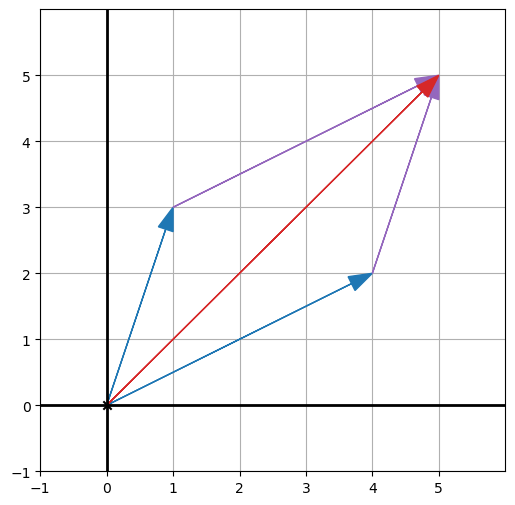

In [4]:
# Vector addition
v = (1, 3)
u = (4, 2)
w = add(v,u)

draw(
    Arrow(v, color=blue),
    Arrow(u, color=blue),
    Arrow(w, u, color=purple),
    Arrow(w, v, color=purple),
    Arrow(w, color=red)
    
)

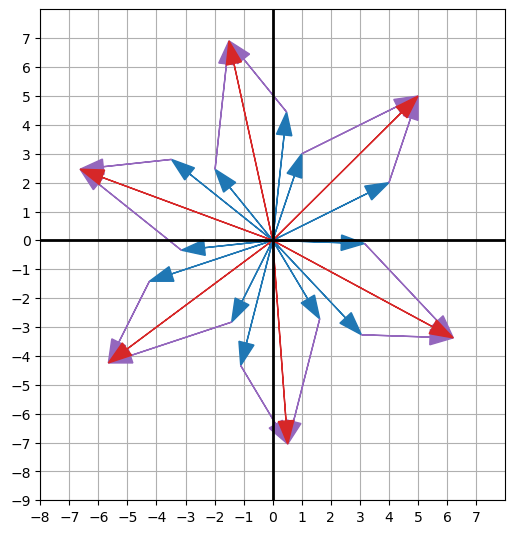

In [5]:
# Vector transformation - rotation
angle = 90 / 180 * pi
v = (1, 3)
u = (4, 2)
w = add(v,u)

def get_arrows(angle_rotation):
    return (
    Arrow(*rotate(angle_rotation,[v]), color=blue),
    Arrow(*rotate(angle_rotation,[u]), color=blue),
    Arrow(*rotate(angle_rotation,[w]), *rotate(angle_rotation,[v]), color=purple),
    Arrow(*rotate(angle_rotation,[w]), *rotate(angle_rotation,[u]), color=purple),    
    Arrow(*rotate(angle_rotation,[w]), color=red),
    )

draw(
    *[arrow for arrows in (get_arrows(i) for i in range(0,6)) for arrow in arrows]
)


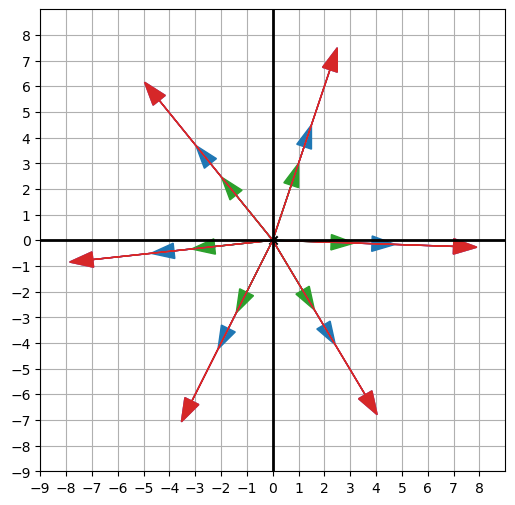

In [6]:
# Vector transformation - scale and rotation
angle = 90 / 180 * pi
v = (1, 3)
u = scale(1.5,v)
w = add(v,u)


    

def get_arrows(angle_rotation):
    return (
    Arrow(*rotate(angle_rotation,[v]), color=green),
    Arrow(*rotate(angle_rotation,[u]), color=blue),
    Arrow(*rotate(angle_rotation,[w]), *rotate(angle_rotation,[v]), color=purple),
    Arrow(*rotate(angle_rotation,[w]), *rotate(angle_rotation,[u]), color=purple),    
    Arrow(*rotate(angle_rotation,[w]), color=red),
    )

draw(
    *[arrow for arrows in (get_arrows(i) for i in range(0,6)) for arrow in arrows]
)

u=(2, 3) v=(1, -1) w=(3, 2)


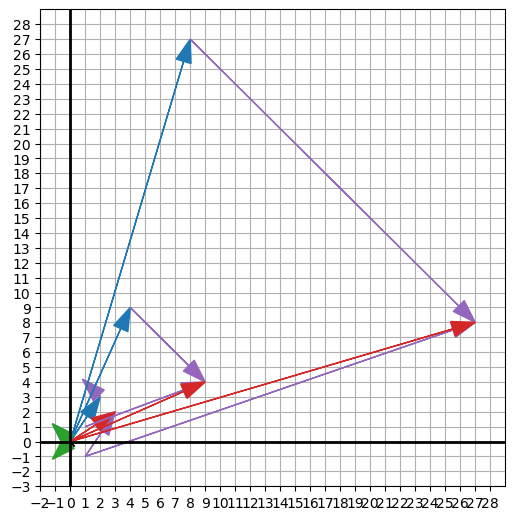

In [7]:
# Non-linear transformation
u = (2, 3)
v = (1, -1)
w = add(u, v)

pow = 2
def raise_coords(power, _vector):
    
    vector = (_vector[0]**power, _vector[1]**power)
    
    return vector


def get_arrows(power):
    return (
    Arrow(raise_coords(power,v), color=green),
    Arrow(raise_coords(power,u), color=blue),
    Arrow(raise_coords(power,w), raise_coords(power,v), color=purple),
    Arrow(raise_coords(power,w), raise_coords(power,u), color=purple),    
    Arrow(raise_coords(power,w), color=red),
    )

print(f'{u=} {v=} {w=}')

draw(
    Arrow(v, color=blue),
    Arrow(u, color=blue),
    Arrow(w, u, color=purple),
    Arrow(w, v, color=purple),
    Arrow(w, color=red),
    *[arrow for arrows in (get_arrows(i) for i in range(2,4)) for arrow in arrows]
    
    
)

/home/jovyan/work/math-for-programmers/C04/vector_drawing.py:117: RuntimeWarning: divide by zero encountered in double_scalars
  new_y = (tip[1] - tail[1]) * (new_length / length)
/home/jovyan/work/math-for-programmers/C04/vector_drawing.py:117: RuntimeWarning: invalid value encountered in double_scalars
  new_y = (tip[1] - tail[1]) * (new_length / length)
/home/jovyan/work/math-for-programmers/C04/vector_drawing.py:118: RuntimeWarning: divide by zero encountered in double_scalars
  new_x = (tip[0] - tail[0]) * (new_length / length)
/home/jovyan/work/math-for-programmers/C04/vector_drawing.py:118: RuntimeWarning: invalid value encountered in double_scalars
  new_x = (tip[0] - tail[0]) * (new_length / length)


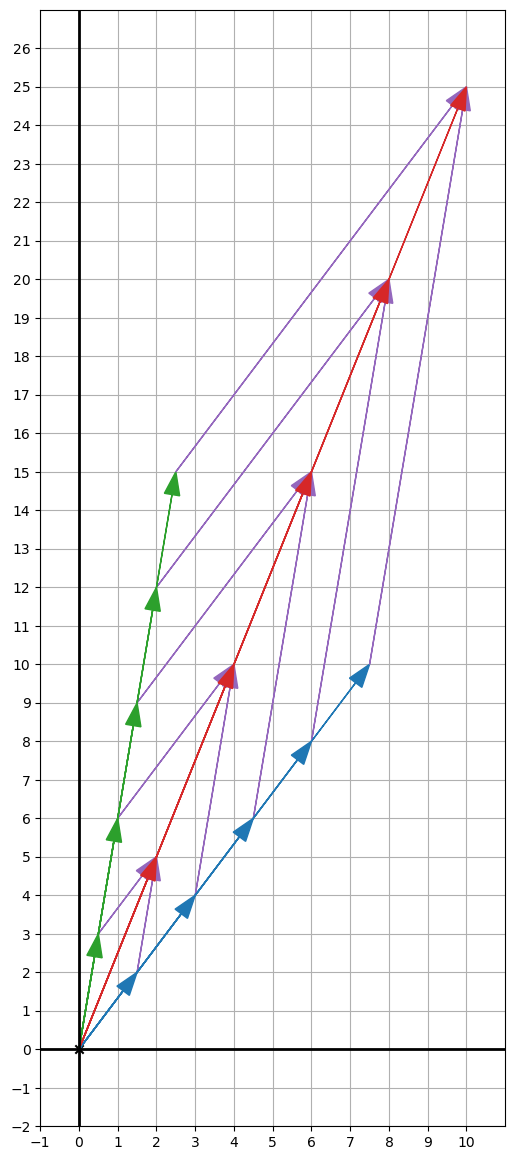

In [8]:
# Vector transformation - scaling preserves sum

v = (0.5, 3)
u = (1.5, 2)
w = add(v,u)


    

def get_arrows(scalar):
    return (
    Arrow(scale(scalar,v), color=green),
    Arrow(scale(scalar,u), color=blue),
    Arrow(scale(scalar,w), scale(scalar,v), color=purple),
    Arrow(scale(scalar,w), scale(scalar,u), color=purple),
    Arrow(scale(scalar,w), color=red),    
    )

draw(
    *[arrow for arrows in (get_arrows(i) for i in range(0,6)) for arrow in arrows]
)

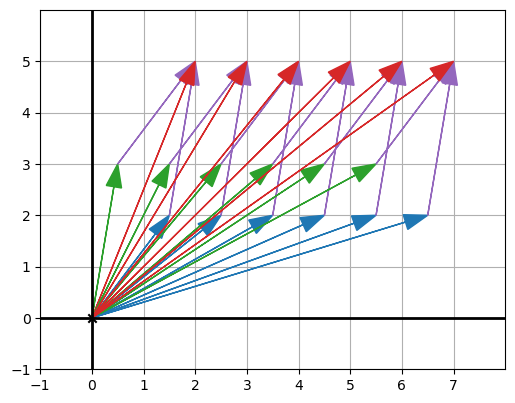

In [9]:
# Vector transformation - translation non-linear

v = (0.5, 3)
u = (1.5, 2)
w = add(v,u)


    

def get_arrows(vector):
    return (
    Arrow(*translate(vector,[v]), color=green),
    Arrow(*translate(vector,[u]), color=blue),    
    Arrow(*translate(vector,[w]), *translate(vector,[v]), color=purple),
    Arrow(*translate(vector,[w]), *translate(vector,[u]), color=purple),    
    Arrow(*translate(vector,[w]), color=red),
    )

draw(
    *[arrow for arrows in (get_arrows((i,0)) for i in range(0,6)) for arrow in arrows]
)

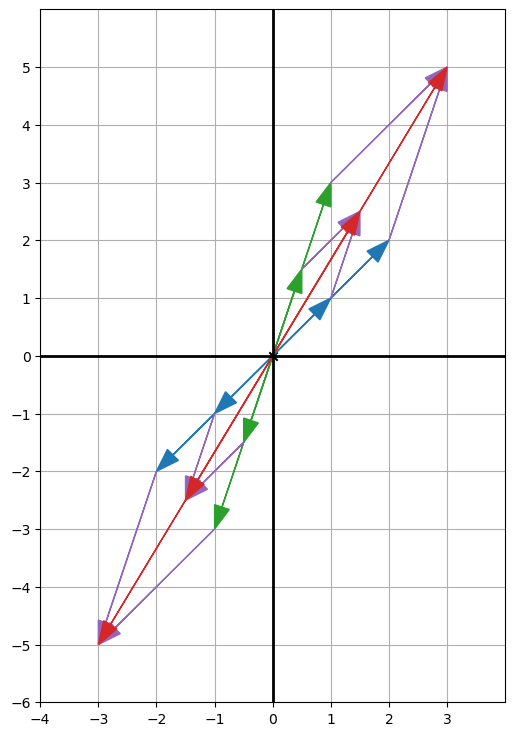

In [10]:
# Linear transformations - linear combinations - midpoints

v = (1, 3)
u = (2, 2)
w = add(v,u)

def get_arrows(scalar):
    return (
    Arrow(scale(scalar,v), color=green),
    Arrow(scale(scalar,u), color=blue),
    Arrow(scale(scalar,w), scale(scalar,v), color=purple),
    Arrow(scale(scalar,w), scale(scalar,u), color=purple),
    Arrow(scale(scalar,w), color=red),    
    )
    


draw(
    # Arrow(v, color=blue),
    # Arrow(u, color=blue),
    # Arrow(w, u, color=purple),
    # Arrow(w, v, color=purple),
    # Arrow(w, color=red),
    *[arrow for arrows in (get_arrows(i) for i in [1, 0.5, -1, -0.5]) for arrow in arrows]
)

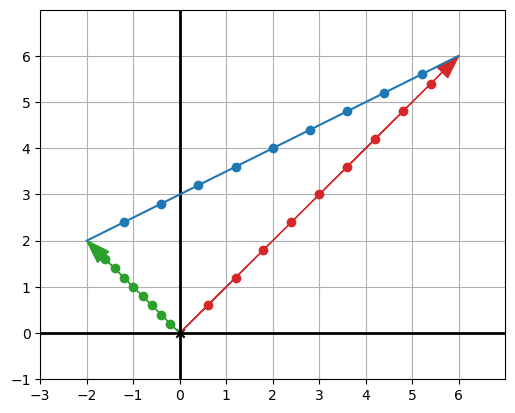

In [11]:
# Linear combination on a line segment

v = (6, 6)
u = (-2, 2)

points = 10
draw(
    Arrow(v),
    Arrow(u, color=green),
    Segment(v, u),
    Points(*[add(scale(s/points, u), scale(1-(s/points), v)) for s in range(1, points)], color=blue),
    Points(*[add(scale(s/points, (0,0)), scale(1-(s/points), v)) for s in range(1, points)], color=red),
    Points(*[add(scale(s/points, (0,0)), scale(1-(s/points), u)) for s in range(1, points)], color=green)
)


In [17]:
# Exercise 4.10
v = (1, 1, 1)

print(f"{raise_coords(2, scale(2,v))=}")
print(f"{scale(2, raise_coords(2, v))=}")

raise_coords(2, scale(2,v))=(4, 4)
scale(2, raise_coords(2, v))=(2, 2)


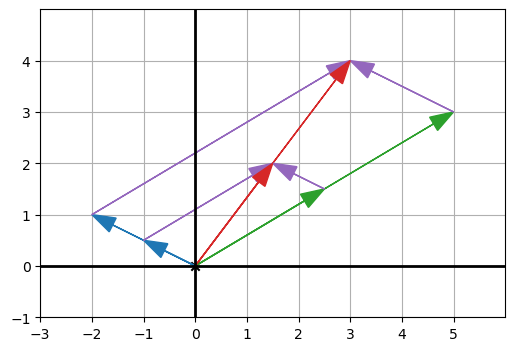

In [19]:
# Exercise 4.12
v = (5, 3)
u = (-2, 1)
w = add(v,u)

def get_arrows(scalar):
    return (
    Arrow(scale(scalar,v), color=green),
    Arrow(scale(scalar,u), color=blue),
    Arrow(scale(scalar,w), scale(scalar,v), color=purple),
    Arrow(scale(scalar,w), scale(scalar,u), color=purple),
    Arrow(scale(scalar,w), color=red),    
    )
    


draw(
    *[arrow for arrows in (get_arrows(i) for i in [1, 0.5]) for arrow in arrows]
)

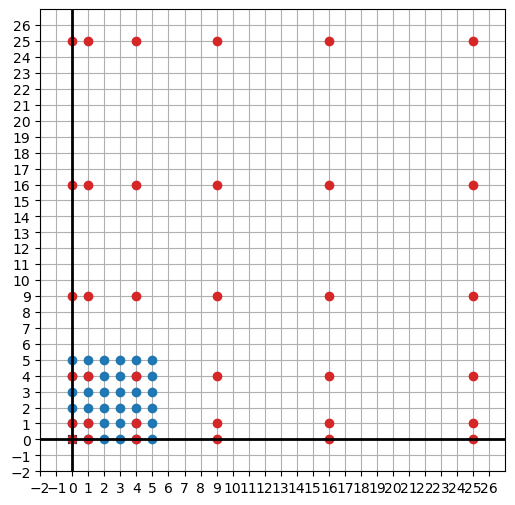

In [51]:
draw(
    *[Points((x1,y1), color=blue) for x1 in range(0,6) for y1 in range(0, 6)],
    *[Points(raise_coords(2,(x1,y1)), color=red) for x1 in range(0,6) for y1 in range(0, 6)],
    # *[Arrow(raise_coords(2,(x1,y1)), (x1,y1), color=red) for x1 in range(0,6) for y1 in range(0, 6)]   
)

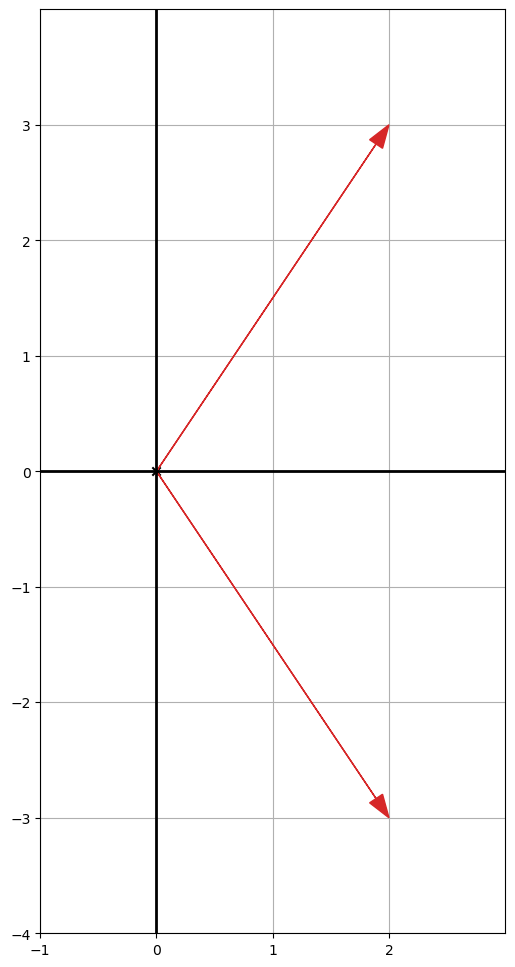

In [56]:
# Exercise 4.16 - Reflection

u = (2,3,4)
reflection = (0, 1, 0)
def reflect(vector, vector_axis=(1,0,0)):
    return (
        (vector[0] + (-2 * vector[0] * vector_axis[0]), 
         vector[1] + (-2 * vector[1] * vector_axis[1]), 
         vector[2] + (-2 * vector[2] * vector_axis[2]))
    )

reflect(u, reflection)

draw(
    Arrow(u),
    Arrow(reflect(u, reflection))
)

In [63]:
# Exercise 4.19
def scale3d(scalar,v):
    return tuple(scalar * coord for coord in v)

def add3d(*vectors):
    return tuple(map(sum,zip(*vectors)))

def linear_combination(scalars, *vectors):
    scaled = [scale3d(s,v) for s,v in zip(scalars, vectors)]
    print(scaled)
    return add3d(*scaled)


linear_combination([1,2,3], (1,0,0), (0,1,0), (0, 0, 1))

[(1, 0, 0), (0, 2, 0), (0, 0, 3)]


(1, 2, 3)

In [73]:
# Exercise 4.20

def rotate2d(angle, vector):
    l,a = to_polar(vector)
    return to_cartesian((l, a+angle))

def rotate_x(angle, vector):
    x,y,z = vector
    new_y, new_z = rotate2d(angle, (y,z))
    return x, new_y, new_z

def rotate_x_by(angle):
    def new_function(v):
        return rotate_x(angle,v)
    return new_function

def transform_standard_basis(transform):
    return transform((1,0,0)), transform((0,1,0)), transform((0,0,1))

for i in transform_standard_basis(rotate_x_by(pi/2)):
    print((round(i[0]), round(i[1]), round(i[2])))

(1, 0, 0)
(0, 0, 1)
(0, -1, 0)
